# Capstone Project - Car Accident Severity
## Coursera - Applied Data Science Capstone

### Introduction: Business Problem

Car accidents can cause property damage and even personal injury.  With available data, perhaps we can limit the damage to property and person by taking preemptive actions if certain situations arise which lead to a greater likelihood of an accident.  

In this project, we will formulate a model to predict the likelihood of an automobile accident and whether or not that accident is likely to result in injury or only property damage.  

There are a number of possible factors relating to accident severity, so we will explore which factors have the greatest impact, not just in the number of accidents, but in overall severity.  We will explore which factors provide the greatest predictive value prior to an accident occurring

We will break the data into training and test sets in order to generate a predictive model to determine the likelihood of an accident, as well as the likelihood of injury in the event of an accident.

### Data

Given that we are exploring accident severity, we will use data from car accidents in the city of Seattle to see if we have sufficient data to predict accident severity.  

We will begin our exploration by importing the necessary libraries as well as uploading and reading the data from a CSV file into a <i>pandas</i> dataframe.  

Once data is in the dataframe, we will begin by exploring and visualizing the data to determine if there are any trends which immediately stick out which could be worth exploring further.  

Notes and observations will be included under the explored data points below.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

print("Library imports complete")

Library imports complete


#### Load data from CSV file and put into <i>pandas</i> dataframe

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


We will copy the initial dataframe into a new dataframe, <i>df</i> and check the first five rows to confirm that we are seeing the data we expect

In [3]:
df = df_data_1
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


We confirm the shape of our dataframe to see how many datapoints we have to work with.  In this case - 194,673 rows with 38 columns

In [4]:
df.shape

(194673, 38)

We confirm the datatypes involved, as there is potential that they may need to be adjusted as we continue our processes

In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Here, we also see the datapoints available.  Many appear to be categorical (i.e. collision types, road/light conditions, etc).  These will likely need to be adjusted to numerical values later in the process

Our ultimate goal is to be able to predict the severity of an accident given available data.  So, our key point will be the <b>SEVERITYCODE</b>      
  
Step 1: Get value counts to determine how many severity codes we have  
Step 2: Normalize results to get a breakdown by percentage  
Step 3: Visualize the breakdown  
Step 4: Confirm that the <b>SEVERITYDESC</b> and <b>SEVERITYCODE</b> numbers match

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
df['SEVERITYCODE'].value_counts(normalize = True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

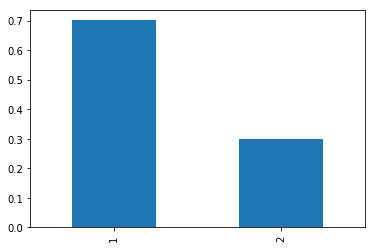

In [8]:
df['SEVERITYCODE'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [9]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

Out of the 194,673 reported car accidents in our dataset, we can see that  
  
136,485 (roughly 70%) resulted in only property damage, while  
 58,188 (roughly 30%) resulted in injury  
   
Now we have a baseline to which we can compare normalized rates of different factors to see if they significantly vary from the average to see if particular factors may have predictive value

#### Break down specific data points  
We will begin by getting value counts for the various datapoints we are exploring.  We will then further break them down by severity and obtain a normalized breakdown to compare with our baseline of roughly 70/30.

###### Light Conditions

In [10]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

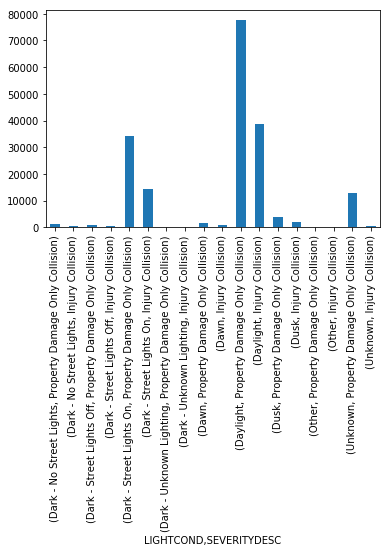

In [11]:
df_light = df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts()
df_light.plot(kind = 'bar')
plt.show

<i>From this breakdown, we can see that the vast majority of accidents (164,644 - nearly 85%) occur in lighting conditions of either 'Daylight' or 'Dark - Street Lights On'</i>  
  
Let's take a look at the normalized results to see how it compares to the 70/30 baseline

In [12]:
df_light_norm = df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts(normalize = True)
df_light_norm

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision    0.782694
                          Injury Collision                  0.217306
Dark - Street Lights Off  Property Damage Only Collision    0.736447
                          Injury Collision                  0.263553
Dark - Street Lights On   Property Damage Only Collision    0.701589
                          Injury Collision                  0.298411
Dark - Unknown Lighting   Property Damage Only Collision    0.636364
                          Injury Collision                  0.363636
Dawn                      Property Damage Only Collision    0.670663
                          Injury Collision                  0.329337
Daylight                  Property Damage Only Collision    0.668116
                          Injury Collision                  0.331884
Dusk                      Property Damage Only Collision    0.670620
                          Injury Collision    

We can see that in daylight, there is a 33.19% chance of an injury accident, which is above the baseline from all accidents

##### Road Conditions
Now we will examine how the various road conditions compare to the baseline to see if there are any with noteworthy variance

In [13]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

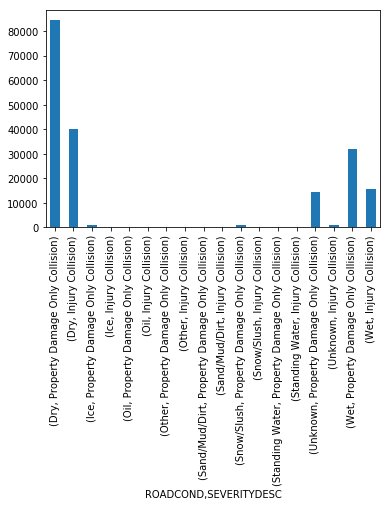

In [14]:
df_cond = df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts()
df_cond.plot(kind = 'bar')
plt.show

From the dataframe and the visualization, it is clear that the vast majority of accidents occur with dry conditions, followed by 'wet' in a distant second

In [15]:
df_cond_norm = df.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts(normalize = True)
df_cond_norm

ROADCOND        SEVERITYDESC                  
Dry             Property Damage Only Collision    0.678227
                Injury Collision                  0.321773
Ice             Property Damage Only Collision    0.774194
                Injury Collision                  0.225806
Oil             Property Damage Only Collision    0.625000
                Injury Collision                  0.375000
Other           Property Damage Only Collision    0.674242
                Injury Collision                  0.325758
Sand/Mud/Dirt   Property Damage Only Collision    0.693333
                Injury Collision                  0.306667
Snow/Slush      Property Damage Only Collision    0.833665
                Injury Collision                  0.166335
Standing Water  Property Damage Only Collision    0.739130
                Injury Collision                  0.260870
Unknown         Property Damage Only Collision    0.950325
                Injury Collision                  0.049675
Wet      

Both <i>dry</i> and <i>wet</i> conditions have a higher likelihood of resulting in injury than the average, based on the data we have.  <i>Wet</i> has a slightly higher rate of injury than <i>dry</i> (33.2% vs 32.2%), however it is worth noting that 63.96% of all accidents occurred with <i>dry</i> conditions, compared to 24.39% with <i>wet</i> condtions.  <i>Dry</i> conditions were listed 2.6x more frequently than <i>wet</i>.

##### Weather Conditions

In [16]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

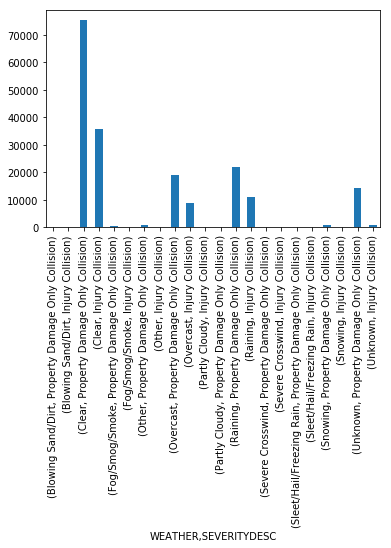

In [17]:
df_weather = df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts()
df_weather.plot(kind = 'bar')
plt.show()

The top 3 weather conditions account for nearly 75% of all reported accidents - Clear, Raining, and Overcast

In [18]:
df_weather_norm = df.groupby(['WEATHER'])['SEVERITYDESC'].value_counts(normalize = True)
df_weather_norm

WEATHER                   SEVERITYDESC                  
Blowing Sand/Dirt         Property Damage Only Collision    0.732143
                          Injury Collision                  0.267857
Clear                     Property Damage Only Collision    0.677509
                          Injury Collision                  0.322491
Fog/Smog/Smoke            Property Damage Only Collision    0.671353
                          Injury Collision                  0.328647
Other                     Property Damage Only Collision    0.860577
                          Injury Collision                  0.139423
Overcast                  Property Damage Only Collision    0.684456
                          Injury Collision                  0.315544
Partly Cloudy             Injury Collision                  0.600000
                          Property Damage Only Collision    0.400000
Raining                   Property Damage Only Collision    0.662815
                          Injury Collision    

All of the top 3 have slightly elevated injury rates over the baseline  
  
Overcast - 31.5%  
Clear - 32.2%  
Raining - 33.7%

##### Other potential factors (not taken into account at this time)
There are a number of possible factors that we could explore - speed, under the influence, inattention, hitting a parked car, collision type, address type - but will not be factored into this particular study, as they do not serve a predictive purpose  
  
The goal of this study is to determine if we can reliably predict the severity of an accident

###### Example - Address Type

In [19]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [20]:
df_address = df.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts()
df_address_norm = df.groupby(['ADDRTYPE'])['SEVERITYDESC'].value_counts(normalize = True)

print(df_address)
print(df_address_norm)

ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision      669
              Injury Collision                     82
Block         Property Damage Only Collision    96830
              Injury Collision                  30096
Intersection  Property Damage Only Collision    37251
              Injury Collision                  27819
Name: SEVERITYDESC, dtype: int64
ADDRTYPE      SEVERITYDESC                  
Alley         Property Damage Only Collision    0.890812
              Injury Collision                  0.109188
Block         Property Damage Only Collision    0.762885
              Injury Collision                  0.237115
Intersection  Property Damage Only Collision    0.572476
              Injury Collision                  0.427524
Name: SEVERITYDESC, dtype: float64


At first glance, these normalized numbers would seem to be great predictors of severity.  However, the location of an accident cannot be known until after an accident occurs, thereby limiting the predictive value

The same conclusion could be drawn for speed, influence, inattention, hitting a parked car, collision type.  
  
While you can predict that IF you are involved in an accident in an intersection, there is a much higher likelihood of injury, but before the accident occurs you cannot reliably estimate the location of the accident

This is different than road, weather, and light conditions, which can all be known prior to an accident occurring.

### Methodology

Now that we have examined the data and determined the factors which provide the most predictive value, we will generate machine learning algorithms to see if we can reliably predict the severity of an accident based on the data available to us.  We will begin with K-Nearest Neighbors, continue to a Support Vector Machine, Logistic Regression, and finish with a Decision Tree

#### Clean, transform, and normalize data for machine learning algorithms
We will begin by setting up a new dataframe to use in the algorithms.  Upon creating the new dataframe, we will drop rows with NaN values

In [21]:
df_algo = df[['LIGHTCOND','WEATHER','ROADCOND','SEVERITYCODE']]
df_algo.head()

,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
0,Daylight,Overcast,Wet,2
1,Dark - Street Lights On,Raining,Wet,1
2,Daylight,Overcast,Dry,1
3,Daylight,Clear,Dry,1
4,Daylight,Raining,Wet,2


In [22]:
df_algo_before = df_algo
df_algo = df_algo.dropna()

print("Original dataset shape: ",df_algo_before.shape)
print("After removing NaN shape: ",df_algo.shape)

Original dataset shape:  (194673, 4)
After removing NaN shape:  (189337, 4)


We have dropped 5,336 rows with NaN values.  This leaves us with 189,337

##### Change from categories to numerical values

In [23]:
df_algo['LIGHTCOND'] = df_algo['LIGHTCOND'].replace({'Daylight':0,'Dark - Street Lights On':1,'Unknown':2,'Dusk':3,'Dawn':4,'Dark - No Street Lights':5,'Dark - Street Lights Off':6,'Other':7,'Dark - Unknown Lighting':8})

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
df_algo['LIGHTCOND'].value_counts()

0    116077
1     48440
2     13456
3      5889
4      2502
5      1535
6      1192
7       235
8        11
Name: LIGHTCOND, dtype: int64

In [25]:
df_algo['WEATHER'] = df_algo['WEATHER'].replace({'Clear':0,'Raining':1,'Overcast':2,'Unknown':3,'Snowing':4,'Other':5,'Fog/Smog/Smoke':6,'Sleet/Hail/Freezing Rain':7,'Blowing Sand/Dirt':8,'Severe Crosswind':9,'Partly Cloudy':10})

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
df_algo['WEATHER'].value_counts()

0     111008
1      33117
2      27681
3      15039
4        901
5        824
6        569
7        113
8         55
9         25
10         5
Name: WEATHER, dtype: int64

In [27]:
df_algo['ROADCOND'] = df_algo['ROADCOND'].replace({'Dry':0,'Wet':1,'Unknown':2,'Ice':3,'Snow/Slush':4,'Other':5,'Standing Water':6,'Sand/Mud/Dirt':7,'Oil':8})

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
df_algo['ROADCOND'].value_counts()

0    124300
1     47417
2     15031
3      1206
4       999
5       131
6       115
7        74
8        64
Name: ROADCOND, dtype: int64

In [29]:
df_algo.head()

,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
0,0,2,1,2
1,1,1,1,1
2,0,2,0,1
3,0,0,0,1
4,0,1,1,2


In [30]:
df_algo.dtypes

LIGHTCOND       int64
WEATHER         int64
ROADCOND        int64
SEVERITYCODE    int64
dtype: object

We have all of our categories transformed into numerical values, with datatype <i>int64</i>.  
  
Now, we can separate our data into X and y, normalize, and split into train and test sets

In [31]:
X = df_algo[['LIGHTCOND','WEATHER','ROADCOND']]
X[0:5]

,LIGHTCOND,WEATHER,ROADCOND
0,0,2,1
1,1,1,1
2,0,2,0
3,0,0,0
4,0,1,1


In [32]:
y = df_algo['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

##### Normalize Data

In [33]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.59511457,  1.10587178,  0.70875343],
       [ 0.34710496,  0.20504641,  0.70875343],
       [-0.59511457,  1.10587178, -0.60855849],
       [-0.59511457, -0.69577897, -0.60855849],
       [-0.59511457,  0.20504641,  0.70875343]])

##### Train Test Split
We will use 70% of the data for training, 30% for testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

print('Train set:', X_train.shape,y_train.shape)
print('Test set:', X_test.shape,y_test.shape)

Train set: (132535, 3) (132535,)
Test set: (56802, 3) (56802,)


### K-Nearest Neighbors (KNN)

#### We will use this model to determine the optimal K for the final KNN algorithm and scoring
We will test up to K = 20

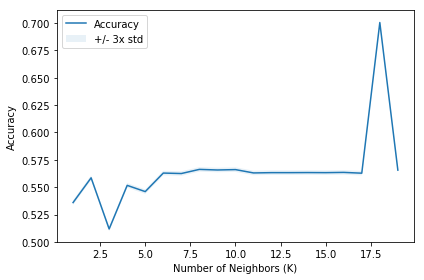

The highest accuracy was 0.700398 with K = 18


In [35]:
Ks = 20
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1,Ks):
    # Train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat_knn)
    
    std_acc[n-1] = np.std(yhat_knn == y_test)/np.sqrt(yhat_knn.shape[0])

plt.plot(range(1,Ks), mean_acc)
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.legend(('Accuracy','+/- 3x std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print("The highest accuracy was %.6f" % mean_acc.max(), "with K =",mean_acc.argmax()+1)

#### Final KNN Algorithm and Scoring (K = 18)

In [36]:
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_prediction = neigh.predict(X_test)

jaccard_knn = jaccard_similarity_score(y_test,knn_prediction)
f1_knn_binary = f1_score(y_test,knn_prediction, average = 'binary')
f1_knn_micro = f1_score(y_test,knn_prediction, average = 'micro')
f1_knn_macro = f1_score(y_test,knn_prediction, average = 'macro')
f1_knn_weighted = f1_score(y_test,knn_prediction, average = 'weighted')
conMx_knn = confusion_matrix(y_test,knn_prediction)

print("K = ",k)
print("jaccard: %0.6f" % jaccard_knn)
print("binary: %0.6f" % f1_knn_binary)
print("micro: %0.6f" % f1_knn_micro)
print("macro: %0.6f" % f1_knn_macro)
print("weighted: %0.6f" % f1_knn_weighted)
print(conMx_knn)


K =  18
jaccard: 0.700398
binary: 0.823801
micro: 0.700398
macro: 0.411959
weighted: 0.577024
[[39783     1]
 [17017     1]]


70% accuracy, but a 57 weighted F1 score.  Only 2 instances were predicted to result in injury, and only one of those correct.  
  
This model seems to do incredibly well at predicting True property damage accidents, but a very poor job of predicting injuries (only 1 correct prediction, with 17,018 incorrect predictions related to injuries)

Perhaps this is a result of too many options:  
Light - 9  
Weather - 11  
Road - 9  

Maybe if we try to minimize the options we might get a more accurate result.  For example, new light conditions could be:  
Daylight = 0  
Dark - Street Lights On = 1  
Everything Else = 2  
  
"Everything Else" accounts for about 15% of the total light conditions.  Perhaps consolidating 7 of the possible options into one will give the model better predictive value.

To test the changes, I am going to create a new dataframe <i>df_cons</i>(olidated).  This way, df_algo will be unaffected

In [37]:
df_cons = df_algo
df_cons.head()

,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
0,0,2,1,2
1,1,1,1,1
2,0,2,0,1
3,0,0,0,1
4,0,1,1,2


In [38]:
df_cons['LIGHTCOND'].replace(to_replace=[3,4,5,6,7,8],value = [2,2,2,2,2,2],inplace = True)
df_cons['LIGHTCOND'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0    116077
1     48440
2     24820
Name: LIGHTCOND, dtype: int64

In [39]:
df_cons['WEATHER'].replace(to_replace = [4,5,6,7,8,9,10],value = [3,3,3,3,3,3,3],inplace = True)
df_cons['WEATHER'].value_counts()

0    111008
1     33117
2     27681
3     17531
Name: WEATHER, dtype: int64

In [40]:
df_cons['ROADCOND'].replace(to_replace = [3,4,5,6,7,8],value = [2,2,2,2,2,2],inplace = True)
df_cons['ROADCOND'].value_counts()

0    124300
1     47417
2     17620
Name: ROADCOND, dtype: int64

I will set up new variables X_con and y_con as well as reset the train/test variables

In [41]:
X_con = df_cons[['LIGHTCOND','WEATHER','ROADCOND']]
X_con[0:5]

,LIGHTCOND,WEATHER,ROADCOND
0,0,2,1
1,1,1,1
2,0,2,0
3,0,0,0
4,0,1,1


In [42]:
y_con = df_cons['SEVERITYCODE'].values
y_con[0:5]

array([2, 1, 1, 1, 2])

In [43]:
X_con = preprocessing.StandardScaler().fit(X_con).transform(X_con.astype(float))
X_con[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.72405604,  1.23180109,  0.85714858],
       [ 0.67368661,  0.25022045,  0.85714858],
       [-0.72405604,  1.23180109, -0.66412946],
       [-0.72405604, -0.73136019, -0.66412946],
       [-0.72405604,  0.25022045,  0.85714858]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_con,y_con,test_size = 0.3, random_state = 1)

print('Train set:', X_train.shape,y_train.shape)
print('Test set:', X_test.shape,y_test.shape)

Train set: (132535, 3) (132535,)
Test set: (56802, 3) (56802,)


### KNN (Consolidated Dataframe)

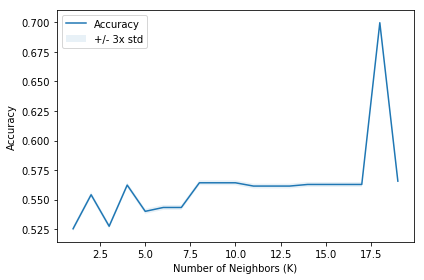

The highest accuracy was 0.699553 with K = 18


In [45]:
Ks = 20
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1,Ks):
    # Train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat_knn)
    
    std_acc[n-1] = np.std(yhat_knn == y_test)/np.sqrt(yhat_knn.shape[0])

plt.plot(range(1,Ks), mean_acc)
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.legend(('Accuracy','+/- 3x std'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print("The highest accuracy was %.6f" % mean_acc.max(), "with K =",mean_acc.argmax()+1)

In [46]:
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_cons_prediction = neigh.predict(X_test)

jaccard_knn_cons = jaccard_similarity_score(y_test,knn_cons_prediction)
f1_knn_binary_cons = f1_score(y_test,knn_cons_prediction, average = 'binary')
f1_knn_micro_cons = f1_score(y_test,knn_cons_prediction, average = 'micro')
f1_knn_macro_cons = f1_score(y_test,knn_cons_prediction, average = 'macro')
f1_knn_weighted_cons = f1_score(y_test,knn_cons_prediction, average = 'weighted')
conMx_knn_cons = confusion_matrix(y_test,knn_cons_prediction)

print("K = ",k)
print("jaccard: %0.6f" % jaccard_knn_cons)
print("binary: %0.6f" % f1_knn_binary_cons)
print("micro: %0.6f" % f1_knn_micro_cons)
print("macro: %0.6f" % f1_knn_macro_cons)
print("weighted: %0.6f" % f1_knn_weighted_cons)
print(conMx_knn_cons)

K =  18
jaccard: 0.699553
binary: 0.823139
micro: 0.699553
macro: 0.412855
weighted: 0.577295
[[39714    70]
 [16996    22]]


69.96% accuracy at K = 18.  This is a little bit worse than before consolidating the dataframe.  Now we will check the jaccard and F1 scores as well as the confusion matrix

Compare the results:

In [49]:
list_jaccard = [jaccard_knn,jaccard_knn_cons]
list_f1_binary = [f1_knn_binary,f1_knn_binary_cons]
list_f1_micro = [f1_knn_micro,f1_knn_micro_cons]
list_f1_macro = [f1_knn_macro,f1_knn_macro_cons]
list_f1_weighted = [f1_knn_weighted,f1_knn_weighted_cons]

df_comparison = pd.DataFrame(list_jaccard, index = ['Original','Consolidated'])
df_comparison.columns = ['Jaccard']
df_comparison.insert(loc = 1, column = 'F1 - Binary', value = list_f1_binary)
df_comparison.insert(loc = 2, column = 'F1 - Micro', value = list_f1_micro)
df_comparison.insert(loc = 3, column = 'F1 - Macro', value = list_f1_macro)
df_comparison.insert(loc = 4, column = 'F1 - Weighted', value = list_f1_weighted)


print(df_comparison)
print(conMx_knn)
print(conMx_knn_cons)

               Jaccard  F1 - Binary  F1 - Micro  F1 - Macro  F1 - Weighted
Original      0.700398     0.823801    0.700398    0.411959       0.577024
Consolidated  0.699553     0.823139    0.699553    0.412855       0.577295
[[39783     1]
 [17017     1]]
[[39714    70]
 [16996    22]]


Overall accuracy is down a bit, but there were more correct injury predictions  
  
The weighted F1 score is improved (57.70 vs 57.73).  
  
Perhaps this means that K-Nearest Neighbors is not the best suited 

### SVM

#### Sigmoid

In [50]:
svm_sigmoid = svm.SVC(kernel = 'sigmoid', gamma = 'auto')
svm_sigmoid.fit(X_train,y_train)

yhat_sigmoid = svm_sigmoid.predict(X_test)

jaccard_sigmoid = jaccard_similarity_score(y_test, yhat_sigmoid)
f1_sigmoid_binary = f1_score(y_test,yhat_sigmoid, average = 'binary')
f1_sigmoid_micro = f1_score(y_test,yhat_sigmoid, average = 'micro')
f1_sigmoid_macro = f1_score(y_test,yhat_sigmoid, average = 'macro')
f1_sigmoid_weighted = f1_score(y_test,yhat_sigmoid, average = 'weighted')
conMx_sigmoid = confusion_matrix(y_test, yhat_sigmoid)

print("Sigmoid")
print("jaccard: %0.6f" % jaccard_sigmoid)
print("binary: %0.6f" % f1_sigmoid_binary)
print("micro: %0.6f" % f1_sigmoid_micro)
print("macro: %0.6f" % f1_sigmoid_macro)
print("weighted: %0.6f" % f1_sigmoid_weighted)
print(conMx_sigmoid)


Sigmoid
jaccard: 0.657723
binary: 0.784576
micro: 0.657723
macro: 0.476042
weighted: 0.599701
[[35404  4380]
 [15062  1956]]


Accuracy is down a bit (65.77%), but a higher weighted F1 score (59.97)

#### RBF

In [51]:
svm_rbf = svm.SVC(kernel = 'rbf', gamma = 'auto')
svm_rbf.fit(X_train,y_train)

yhat_rbf = svm_rbf.predict(X_test)

jaccard_rbf = jaccard_similarity_score(y_test, yhat_rbf)
f1_rbf_binary = f1_score(y_test,yhat_rbf, average = 'binary')
f1_rbf_micro = f1_score(y_test,yhat_rbf, average = 'micro')
f1_rbf_macro = f1_score(y_test,yhat_rbf, average = 'macro')
f1_rbf_weighted = f1_score(y_test,yhat_rbf, average = 'weighted')
conMx_rbf = confusion_matrix(y_test, yhat_rbf)

print("RBF")
print("jaccard: %0.6f" % jaccard_rbf)
print("binary: %0.6f" % f1_rbf_binary)
print("micro: %0.6f" % f1_rbf_micro)
print("macro: %0.6f" % f1_rbf_macro)
print("weighted: %0.6f" % f1_rbf_weighted)
print(conMx_rbf)



RBF
jaccard: 0.700398
binary: 0.823805
micro: 0.700398
macro: 0.411902
weighted: 0.576991
[[39784     0]
 [17018     0]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

In [52]:
decTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 15)
decTree.fit(X_train,y_train)
yhat_decTree = decTree.predict(X_test)

jaccard_decTree = jaccard_similarity_score(y_test, yhat_decTree)
f1_decTree_binary = f1_score(y_test,yhat_decTree, average = 'binary')
f1_decTree_micro = f1_score(y_test,yhat_decTree, average = 'micro')
f1_decTree_macro = f1_score(y_test,yhat_decTree, average = 'macro')
f1_decTree_weighted = f1_score(y_test,yhat_decTree, average = 'weighted')
conMx_decTree = confusion_matrix(y_test, yhat_decTree)

print("jaccard: %0.6f" % jaccard_decTree)
print("binary: %0.6f" % f1_decTree_binary)
print("micro: %0.6f" % f1_decTree_micro)
print("macro: %0.6f" % f1_decTree_macro)
print("weighted: %0.6f" % f1_decTree_weighted)
print(conMx_decTree)


jaccard: 0.700398
binary: 0.823805
micro: 0.700398
macro: 0.411902
weighted: 0.576991
[[39784     0]
 [17018     0]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [53]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
proba = LR.predict_proba(X_test)

jaccard_LR = jaccard_similarity_score(y_test,yhat_LR)
f1_LR_binary = f1_score(y_test,yhat_LR, average = 'binary')
f1_LR_micro = f1_score(y_test,yhat_LR, average = 'micro')
f1_LR_macro = f1_score(y_test,yhat_LR, average = 'macro')
f1_LR_weighted = f1_score(y_test,yhat_LR, average = 'weighted')
log_loss_LR = log_loss(y_test, proba)
conMx_LR = confusion_matrix(y_test, yhat_LR)

print("jaccard: %0.6f" % jaccard_LR)
print("binary: %0.6f" % f1_LR_binary)
print("micro: %0.6f" % f1_LR_micro)
print("macro: %0.6f" % f1_LR_macro)
print("weighted: %0.6f" % f1_LR_weighted)
print("Log loss: %0.6f" % log_loss_LR)
print(conMx_LR)


jaccard: 0.700398
binary: 0.823805
micro: 0.700398
macro: 0.411902
weighted: 0.576991
Log loss: 0.600862
[[39784     0]
 [17018     0]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


I thought about checking what the results would be if every prediction was property damage.  SVM - RBF, Decision Tree, and Logistic Regression all predicted 0 injury accidents, so no additional tests need to be done in that regard

# Results and Discussion

In [56]:
list_jaccard = [jaccard_knn_cons,jaccard_sigmoid,jaccard_rbf,jaccard_decTree,jaccard_LR]
list_f1_binary = [f1_knn_binary_cons,f1_sigmoid_binary,f1_rbf_binary,f1_decTree_binary,f1_LR_binary]
list_f1_micro = [f1_knn_micro_cons,f1_sigmoid_micro,f1_rbf_micro,f1_decTree_micro,f1_LR_micro]
list_f1_macro = [f1_knn_macro_cons,f1_sigmoid_macro,f1_rbf_macro,f1_decTree_macro,f1_LR_macro]
list_f1_weighted = [f1_knn_weighted_cons,f1_sigmoid_weighted,f1_rbf_weighted,f1_decTree_weighted,f1_LR_weighted]
list_log_loss = ['NA','NA','NA','NA',log_loss_LR]

df_report = pd.DataFrame(list_jaccard, index = ['KNN','SVM - Sigmoid','SVM - RBF','Decision Tree','Logistic Regression'])
df_report.columns = ['Jaccard']
df_report.insert(loc = 1, column = 'F1 - Binary', value = list_f1_binary)
df_report.insert(loc = 2, column = 'F1 - Micro', value = list_f1_micro)
df_report.insert(loc = 3, column = 'F1 - Macro', value = list_f1_macro)
df_report.insert(loc = 4, column = 'F1 - Weighted', value = list_f1_weighted)
df_report.insert(loc = 5, column = 'LogLoss', value = list_log_loss)

df_report

,Jaccard,F1 - Binary,F1 - Micro,F1 - Macro,F1 - Weighted,LogLoss
KNN,0.699553,0.823139,0.699553,0.412855,0.577295,NA
SVM - Sigmoid,0.657723,0.784576,0.657723,0.476042,0.599701,NA
SVM - RBF,0.700398,0.823805,0.700398,0.411902,0.576991,NA
Decision Tree,0.700398,0.823805,0.700398,0.411902,0.576991,NA
Logistic Regression,0.700398,0.823805,0.700398,0.411902,0.576991,0.600862


These numbers do not look very promising for the predictive value of these models, given the data we are using.  
  
If we are looking at simple accuracy, or even the binary F1 score, we do ok - in the 70% range, with an F1 score > 82.  However, those do not tell the whole story.  
  
It is probably best to use a weighted F1 score, as it is an imbalanced data set (roughly 70/30 property/injury).  If all we do is predict property damage for every accident, we have a slightly higher than 70% chance of being correct.  
  
Unfortunately, that doesn't tell us anything.  
  
So, we use the weighted F1 score, and the Support Vector Machine, using the "sigmoid" kernel give us the best result, though only 59.97.  The sigmoid kernel is the only one that produced more than 22 correct injury preditions.  With that said, it still wasn't particularly accurate.

As discussed previously, there are some data points that have a significant impact on the number of injury accidents - speed, under the influence, inattentiveness, address type - but these are not very good predictors since they cannot be known prior to an accident occurring.  

Now, just because there is limited predictive value from the models, does that mean that there is nothing to be learned from this exercise?  
  
Hardly  
  
In daylight conditions, an accident is more likely to involve injury (33.19%) than a random accident.

#### What can we learn from this?

It seems like there is a higher likelihood of an injury when accidents occur in seemingly ideal conditions - daylight, clear weather, and dry roads.  
  
Perhaps this is because of a general comfort driving under those conditions.  
  
Perhaps it is because when the lighting, weather, and roads do not have favorable conditions, people are driving more carefully, or slower, reducing the chances of injury, while increasing the chances of a property damage accident.  
  
At the same time, the numbers are not wildly skewed, they are only slightly more likely to result in injury under seemingly ideal conditions

#### Further exploration

This could be worth exploring further, but goes beyond the scope of this exercise.  
  
- What is the actual breakdown of time for each of the various conditions?
- What is the likelihood of an accident occurring under certain conditions?  (While there are more accidents in dry road conditions than snow - What is the likelihood of an accident occurring under the various conditions)
- Put another way, what is the likelihood of NOT having an accident at all under various road conditions
- How many cars are on the road under various conditions?
- Are there varying degrees of personal injury? (Minor, Severe, Hospitalization, Death)  
  
These are all questions that could be worth further exploration and possibly provide greater predictive value of whether or not an accident would result in injury.  Perhaps some predictive value could be gained regarding whether or not an accident can be predicted

# Conclusion

The purpose of this project was to determine if we can predict the severity of a car accident given the data we had from the city of Seattle.  
  
Since the dataset is very imbalanced, we could attain a little more than 70% accuracy by simply always predicting property damage only for an accident.  Unfortunately, that would not tell us very much.  
  
Given the data points available, and specifically the data which could be known prior to an accident occurring, none of the machine learning models implemented provided any significant predictive value.  Some were ok at predicting property damage, but none of them did a good job of predicting injury.  
  
It can be worth noting that accidents (and injuries) are more likely under relatively ideal conditions, but we can so far only speculate on the reasons behind that finding.

Final Conclusion:  
If we are trying to determine the likelihood of an accident resulting in injury, there is minimal predictive value from any of the machine learning models we used given data on light, weather, and road conditions.  
  
Further research could potentially provide greater insight, but goes beyond the scope of this project